# Generating a 15MHz Chirp at 30.72MS/s

To begin lets generate the chirp at 30.72MS/s. When we recieve the signal from the ADC, we will interpolate by x4 before post processing.

In [99]:
import numpy as np
from scipy import signal

# Parameters
fs = 30.72e6
T = 1/fs
L = 6144

# Generate Time Vector
t = np.linspace(0, L*T, L)

# Generate Signal - 1MHz to 15MHz Chirp
f0 = 1e6
f1 = 15e6
t1 = L*T
x = signal.chirp(t, f0, t1, f1, method='linear', phi=0)

<IPython.core.display.Javascript object>


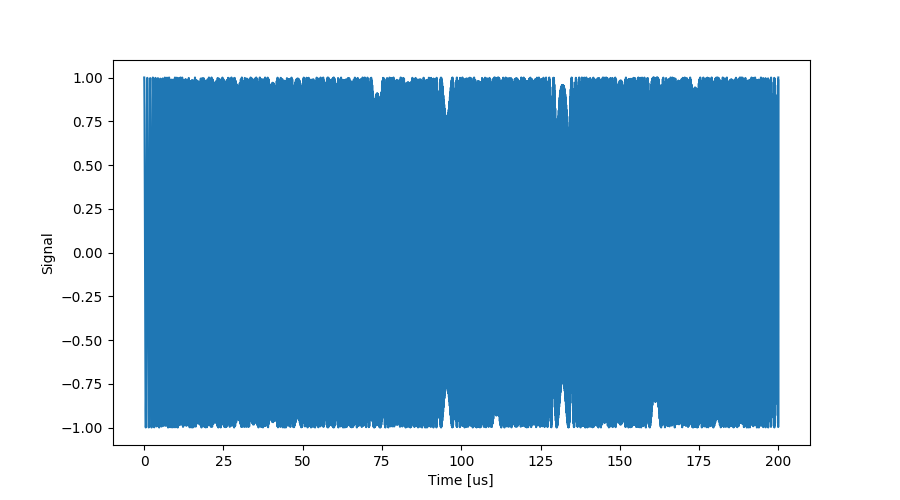

In [114]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Generate new figure
fig = plt.figure(figsize=(9, 5))

# Plot x(t) with t in microseconds
plt.plot(t*1e6,x)

# Label Axis
plt.xlabel('Time [us]')
plt.ylabel('Signal')
plt.show()

Now we will interpolate by x4 and see what the signal looks like.

<IPython.core.display.Javascript object>


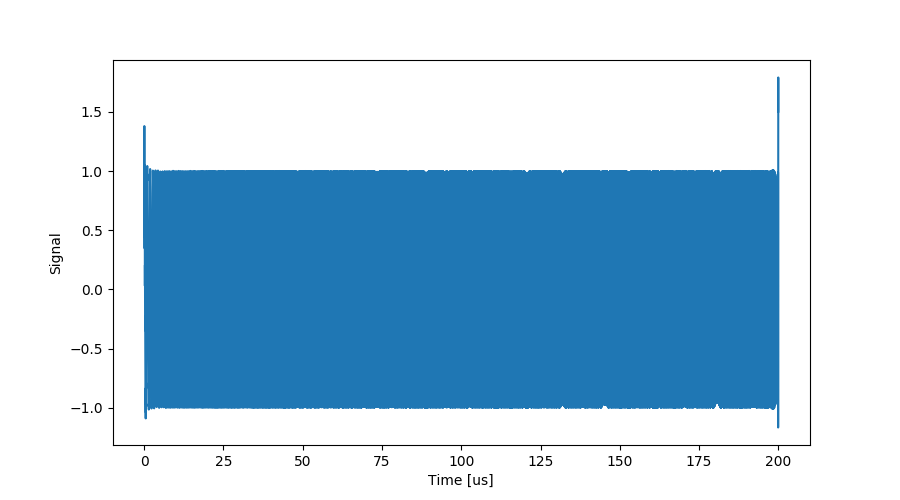

In [105]:
# New Parameters
fs_new = 122.88e6
T_new = 1/fs_new
L_new = 24576
t_new = np.linspace(0, L_new*T_new, L_new)

# Interpolate
y = signal.resample(x, L_new)

# Generate new figure
fig = plt.figure(figsize=(9, 5))

# Plot y(t) with t in microseconds
plt.plot(t_new*1e6,y)

# Label Axis
plt.xlabel('Time [us]')
plt.ylabel('Signal')
plt.show()

Next lets look at the spectrum.

<IPython.core.display.Javascript object>


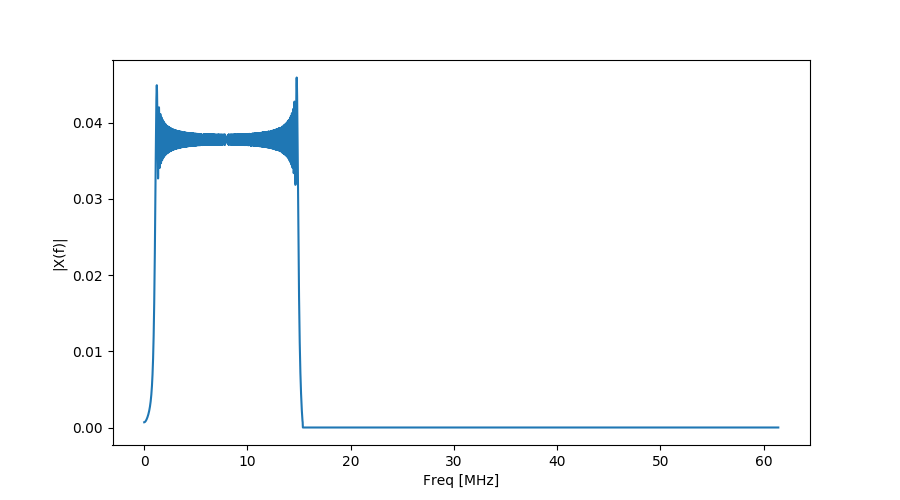

In [104]:
# Compute FFT & Frequency Bins
spectrum = np.fft.fft(y)
freq = np.fft.fftfreq(y.size, T_new)

# Plot Normalised |X(f)|
fig = plt.figure(figsize=(9, 5))
plt.plot(freq[1:int((np.size(freq)/2)-1)]/1e6, np.abs(spectrum[1:int((np.size(freq)/2)-1)]/L))

# Label Axis
plt.xlabel('Freq [MHz]')
plt.ylabel('|X(f)|')
plt.show()